<a href="https://colab.research.google.com/github/Suchandra21/Fifa_20_players-analysis/blob/main/Hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset
import pandas as pd
hotel=pd.read_csv(r"/content/drive/MyDrive/DS/Hotel Bookings (1) (1) (1).csv")

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.shape

(119390, 32)

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Handling the duplicate values**

----

In [ ]:
print("Do we have any duplicate data? ",hotel.duplicated().any())

Do we have any duplicate data?  True


In [ ]:
dup_val=hotel.duplicated().sum()
print("No of duplicats: ",dup_val)

No of duplicats:  31994


In [ ]:
hotel.drop_duplicates(inplace=True)

In [ ]:
print("Do we have any more duplicate after the removal? ")
if hotel.duplicated().any()==False:
  print("No more duplicates")

Do we have any more duplicate after the removal? 
No more duplicates


In [ ]:
dup_val_new=hotel.duplicated().sum()
print("No of duplicates: ",dup_val_new)

No of duplicates:  0


In [ ]:
# new shape of the dataset
hotel.shape

(87396, 32)

# **Handling missing or null values**

---


In [ ]:
print("Are here any null or missing vaues? ",hotel.isna().sum().any())

Are here any null or missing vaues?  True


In [ ]:
import pandas as pd
null_val=pd.DataFrame(hotel.isnull().sum()).rename(columns={0:"No of null values"})
null_val

,No of null values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# seeing the percentage of the null values in each column
per_null_val=pd.DataFrame(round(hotel.isnull().sum()*100/len(hotel),4)).rename(columns={0:"Percentage of null values"})
per_null_val

,Percentage of null values
hotel,0.0000
is_canceled,0.0000
lead_time,0.0000
arrival_date_year,0.0000
arrival_date_month,0.0000
arrival_date_week_number,0.0000
arrival_date_day_of_month,0.0000
stays_in_weekend_nights,0.0000
stays_in_week_nights,0.0000
adults,0.0000


In [ ]:
# the records which contain the null values
per_null_val[per_null_val["Percentage of null values"]!=0.00]

,Percentage of null values
children,0.0046
country,0.5172
agent,13.9514
company,93.9826


In [ ]:
# drop the column having the most null values
hotel.drop(columns='company',inplace=True)

In [ ]:
# filling the columns with misisng values with their most frequent values
hotel['children']=hotel['children'].fillna(hotel['children'].mode()[0])
hotel['country']=hotel['country'].fillna(hotel['country'].mode()[0])
hotel['agent']=hotel['agent'].fillna(hotel['agent'].mode()[0])

In [ ]:
null_val=pd.DataFrame(hotel.isna().sum()).rename(columns={0:'No of null values'})
null_val

,No of null values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
per_null_val=pd.DataFrame(round(hotel.isnull().sum()*100/len(hotel),4)).rename(columns={0:"Percentage of null values"})
per_null_val

,Percentage of null values
hotel,0.0
is_canceled,0.0
lead_time,0.0
arrival_date_year,0.0
arrival_date_month,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0


In [ ]:
per_null_val[per_null_val["Percentage of null values"]!=0.00]

,Percentage of null values


In [ ]:
# new shape of the dataset
hotel.shape

(87396, 31)

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,82.260287,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.061182,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


# **Handling outliers**

In [ ]:
# Categorical data
cat_data=[]
dtypes=hotel.dtypes
for i in hotel.columns:
  if dtypes[i]=="object":
    cat_data.append(i)
print("The dataset has ",len(cat_data)," number of categorical data and those are:")
cat_data

The dataset has  12  number of categorical data and those are:


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Numerical data
num_data=[]
dtypes=hotel.dtypes
for i in hotel.columns:
  if dtypes[i]=="int64" or dtypes[i]=="float64":
    num_data.append(i)
print("The number of numerical data are ",len(num_data)," and those are:")
num_data

The number of numerical data are  19  and those are:


['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# obtaining the discrete variables from  the numerical values(len<150)
dis_var=[]
for i in num_data:
  if len(hotel[i].value_counts())<150:
    dis_var.append(i)
    print(i," : ",hotel[i].unique())
    print("---"*28)
  else:
    pass
print("\n The dataset has ",len(dis_var)," discrete variables.")

is_canceled  :  [0 1]
------------------------------------------------------------------------------------
arrival_date_year  :  [2015 2016 2017]
------------------------------------------------------------------------------------
arrival_date_week_number  :  [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
------------------------------------------------------------------------------------
arrival_date_day_of_month  :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------------------------------------------------------------------------------
stays_in_weekend_nights  :  [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
------------------------------------------------------------------------------------
stays_in_week_nights  :  [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 3

In [ ]:
# obtaining the continuous vaiables from numerical values
cont_var=[]
for i in num_data:
  if i not in dis_var:
    cont_var.append(i)
    print(i)
  else:
    pass
print("\nThere were ",len(cont_var)," number of continuous variables")

lead_time
agent
adr

There were  3  number of continuous variables


In [ ]:
# for ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

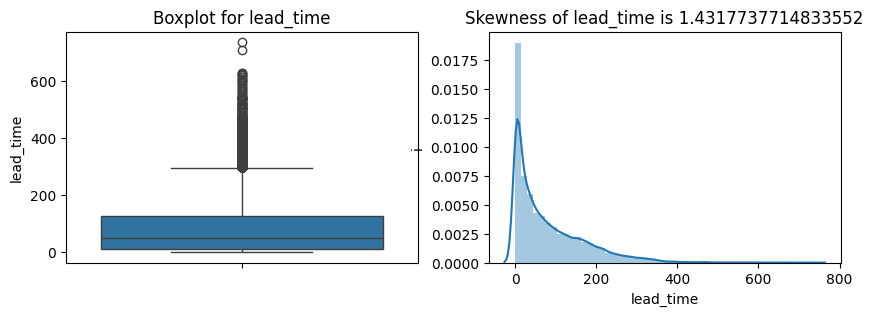

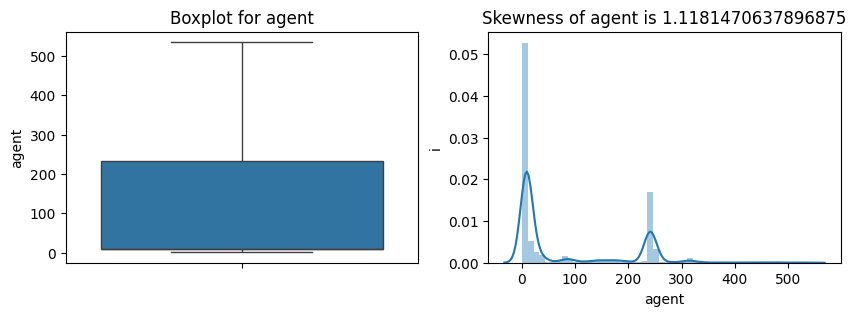

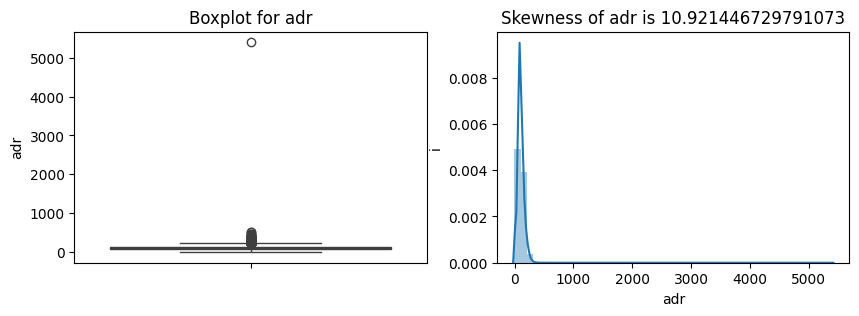

In [ ]:
# checking for outliers in  the continuous variables
from scipy.stats import norm
import seaborn as sns
from matplotlib import pyplot as plt
for i in cont_var:
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=hotel[i])
  ax.set_title(f"Boxplot for {i}")
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.distplot(hotel[i])
  ax.set_title(f"Skewness of {i} is {hotel[i].skew()}")
  ax.set_ylabel("i")

In [ ]:
hotel.shape

(87396, 31)

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,82.260287,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.061182,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


# **Data Wrangling and Feature Engineering**

In [ ]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# seeing the columns
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# checking unique values in each variable
for i in hotel.columns:
  print(f"{i} : {hotel[i].unique()}")
  print("---"*29)

hotel : ['Resort Hotel' 'City Hotel']
---------------------------------------------------------------------------------------
is_canceled : [0 1]
---------------------------------------------------------------------------------------
lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [ ]:
#changing the datatypes of children,agent from float to int
hotel[["agent","children"]]=hotel[["agent","children"]].astype("int64")

In [ ]:
#changing the datatype of  reservation_status_date  as datetime64
hotel["reservation_status_date"]=pd.to_datetime(hotel["reservation_status_date"],format="%Y-%m-%d")

In [ ]:
# checking the datatype
hotel[["children","agent","reservation_status_date"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   children                 87396 non-null  int64         
 1   agent                    87396 non-null  int64         
 2   reservation_status_date  87396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [ ]:
hotel["reservation_status_date"]

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


In [ ]:
# adding stays_in_weekend_nights and stays_in_week_nights and converting it to total_stay
hotel["total_stay"]=hotel["stays_in_weekend_nights"]+hotel["stays_in_week_nights"]

In [ ]:
# adding the adults,children,babies to make total_members
hotel['total_members']=hotel['babies']+hotel['children']+hotel['adults']

In [ ]:
#creating total_children by adding babies and children
hotel['total_children']=hotel['babies']+hotel['children']

In [ ]:
# creating reserved_room_assigned to see if the reserved room type is assigned or not
import numpy as np
hotel['reserved_room_assigned']=np.where(hotel['reserved_room_type']==hotel['assigned_room_type'],'yes','no')

In [ ]:
# creating guest_category from total_members
hotel['guest_category']=np.where(hotel['total_members']==1,'single',np.where((hotel['total_members']==2),'couple','family'))

In [ ]:
# creating lead_time_category from lead_time
hotel['lead_time_category']=np.where(hotel['lead_time']<=15,'low',
                                     np.where((hotel['lead_time']>15) & (hotel['lead_time']<90),'medium','high'))

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_members,total_children,reserved_room_assigned,guest_category,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,0,yes,couple,high
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,0,yes,couple,high
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0,no,single,low
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0,yes,single,low
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,2,2,0,yes,couple,low


In [ ]:
hotel.shape

(87396, 37)

In [ ]:
hotel.drop(hotel[hotel['total_members']==0].index,inplace=True)

In [ ]:
hotel.shape

(87230, 37)

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

# **Exploratory Analysis(EDA)**

### Univariate analysis

In [ ]:
#selecting the excluded variables
ex_var=[]
for var in hotel.columns:
  if len(hotel[var].value_counts())>15:
    ex_var.append(var)
ex_var

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'country',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'reservation_status_date',
 'total_stay']

In [ ]:
# selecting the target variables
target_val=[]
for var in hotel.columns:
  if var not in ex_var:
    target_val.append(var)
print(target_val)
print(f"{len(target_val)} target variables")

['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'total_members', 'total_children', 'reserved_room_assigned', 'guest_category', 'lead_time_category']
24 target variables


In [ ]:
# selecting r to autofit the number and the size of plots
r=int(len(target_val)/3+1)
r

9

In [ ]:
# to notate the percent count at the top of the bars
def annot(axes):
  for p in plot.patches:
    total_height=sum(p.get_height() for p in plot.patches)/100
    percent_height=round(p.get_height()/total_height,2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    plot.annotate(f"{percent_height}%" ,(x,y),ha="center",va="bottom")

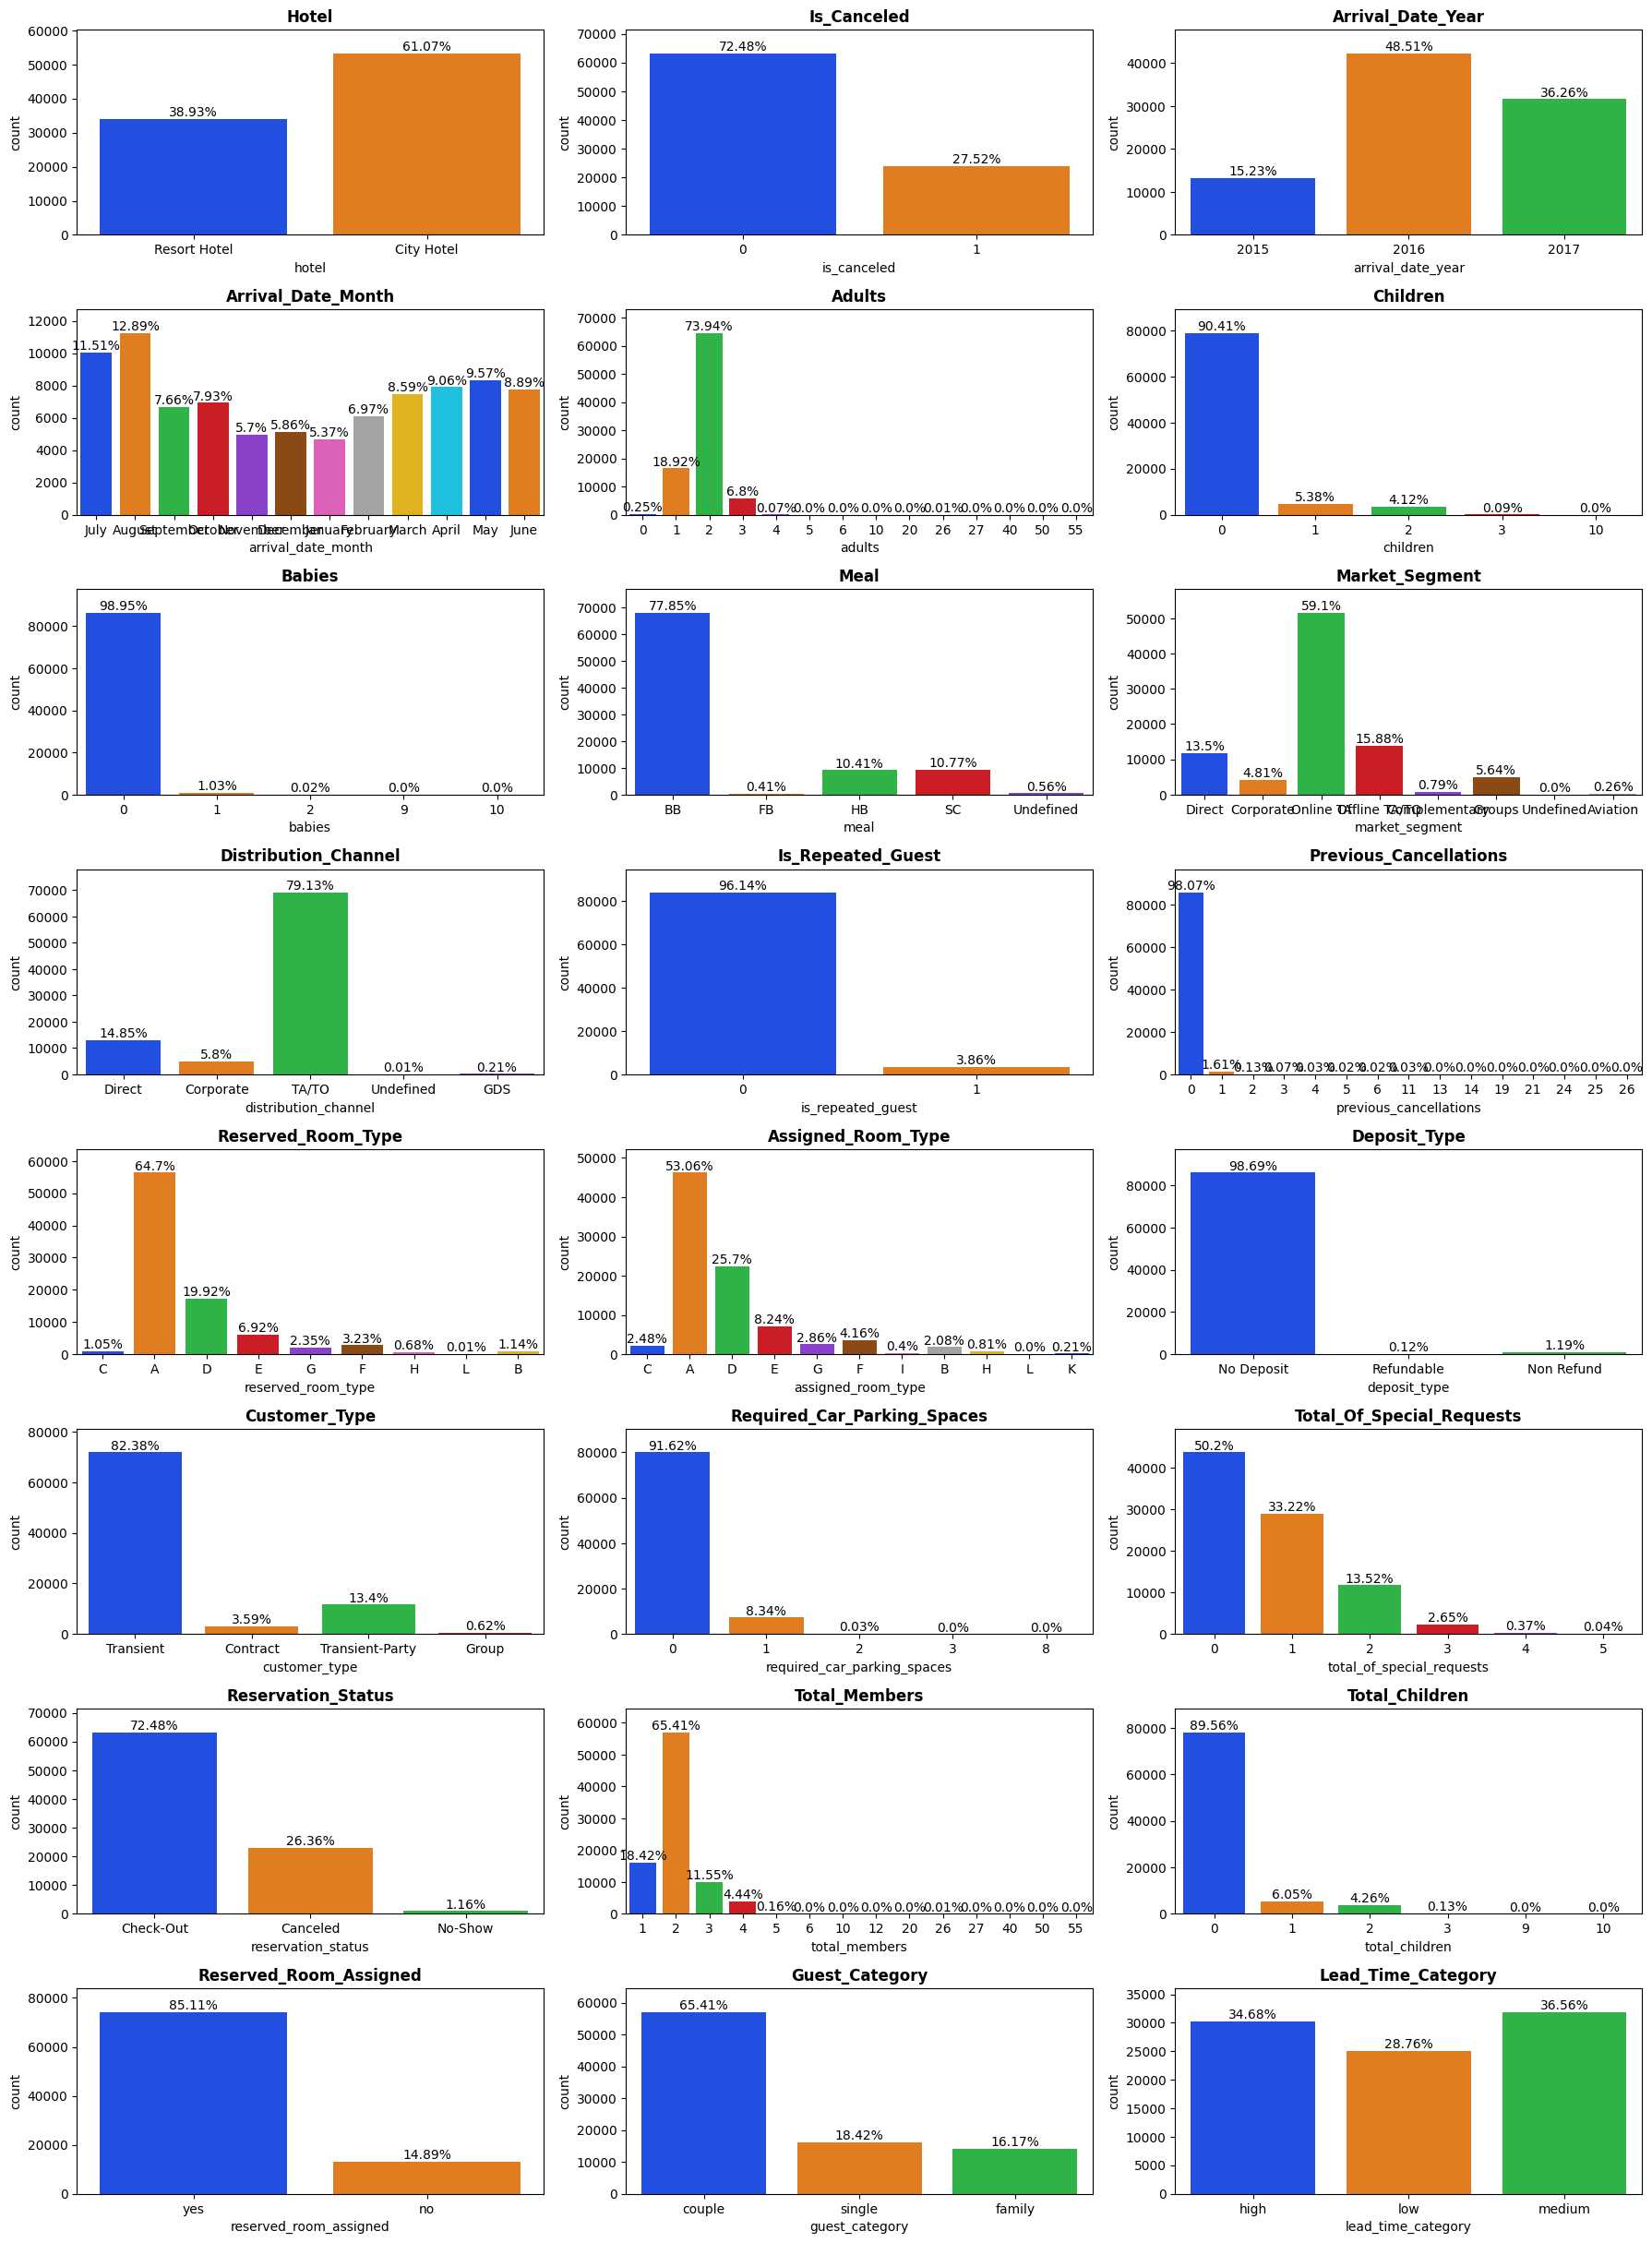

In [ ]:
# plotting the counterplot
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_val):
  plot=plt.subplot(r,3,n+1)
  sns.countplot(x=hotel[var],palette="bright").margins(y=0.13)
  plt.title(f"{var.title()}",weight="bold")
  plt.tight_layout()
  annot(plot)

### Obersvations
* A city hotel was most preferred by 61.07 percent of customers over a resort.   
* 72.48% of bookings are not cancelled. Almost one-third of all reservations are canceled.
*   Bookings increased by 33.28% in 2016 compared to 2015, but fell by 12.25% in 2017.
*   Customers make the most reservations in August, followed by July. Customers made the fewest reservations in November, December, and January. So we can make offers to customers in November, December, and January to maximise booking.
* BB is the most requested food.  
* Most of the bookings are made through the online platform.
*  The top distribution channel is TA/TO, which is used to make most of the bookings.
* The customer's top preference is for Room A to be reserved.
* The majority of hotel bookings are made by new customers. Very few customers (3.86%) visited again.
* Customers do not want to pay a pre-deposit for a reservation.
* Most customers (80%) preferred to book a hotel for a short stay.
* 90% of people do not require parking spaces for their vehicles.
* 70% chance that bookings will not be cancelled by customers.
* Reserved rooms were not assigned to 15% of customers. Ensure that customers receive the rooms they have reserved.
* Reservations were often made for two people. 10% or so of guests brought their families. Few bring their families with them. Offer family-friendly discounts to encourage reservations for family and business events.

### Bivariate Analysis

> **1)   Is not having the assigned rooms resevred a reason for booking cancellations?**

<function matplotlib.pyplot.show(close=None, block=None)>

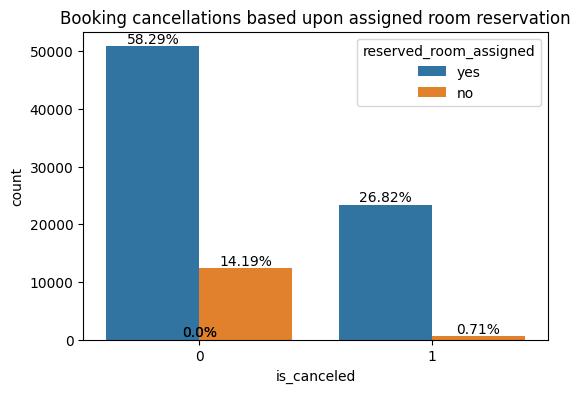

In [ ]:
# plotting the batplot for showing the relation for the booking cancellations and the reserved_room_assigned
plt.figure(figsize=(6,4))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['is_canceled'],hue=hotel['reserved_room_assigned'])
plt.title("Booking cancellations based upon assigned room reservation")
annot(plot)
plt.show

Conclusion : Reserved room was asssigned to the customers is not a factor for the cancellations in reservations.





>**2) Is high lead_time a reason for booking cancellations?**



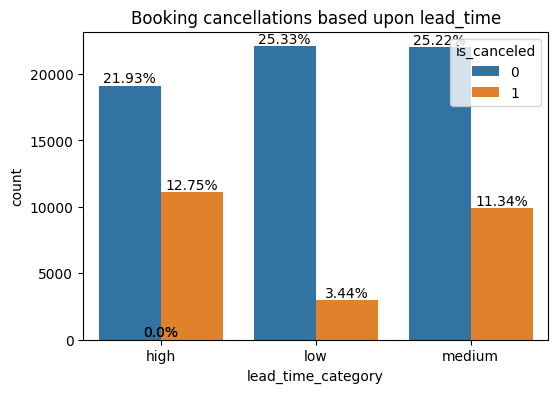

In [ ]:
# plotting the countplot for showing the dpendency of the lead_time with the booking cancellations
plt.figure(figsize=(6,4))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['lead_time_category'],hue=hotel['is_canceled'])
plt.title("Booking cancellations based upon lead_time")
annot(plot)
plt.show()

Conclusion : Cancellations do not rely  upon the criteria of lead_time



> **3) For which category of guests the reservations was made the most?**



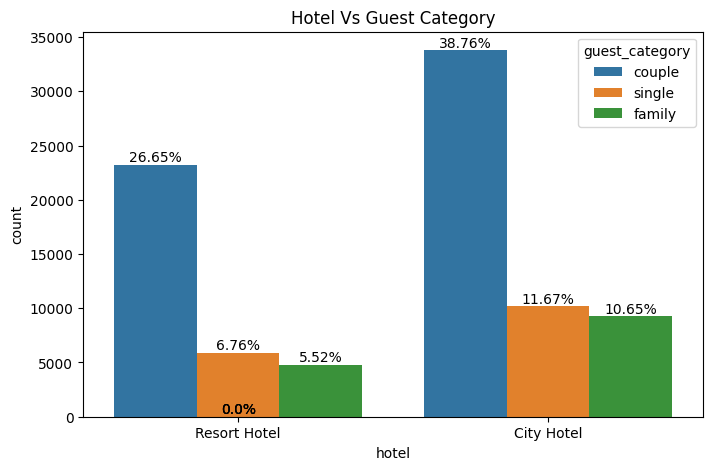

In [ ]:
#plotting the countplot for the hotel and guest_category
plt.figure(figsize=(8,5))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['hotel'],hue=hotel['guest_category'])
plt.title("Hotel Vs Guest Category")
annot(plot)
plt.show()

Conclusion : Mostly the reservations are done two people(couple).City hotels are more preferred for family(more than 2 people),single(1 person) and couple bookings.



> **4) Which hotel has the most advanced reservations?**



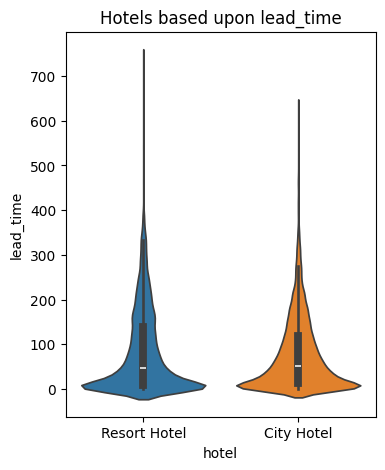

In [ ]:
# plotting the violinplot for hotel and lead_time
plt.figure(figsize=(4,5))
sns.violinplot(x=hotel['hotel'],y=hotel['lead_time'],hue=hotel['hotel'])
plt.title("Hotels based upon lead_time")
plt.show()

Conclusion : The reservations of the resort hotels have to be done a bit earlier than the city hotels



> **5) Which distribution channels has most cancellations of bookings?**



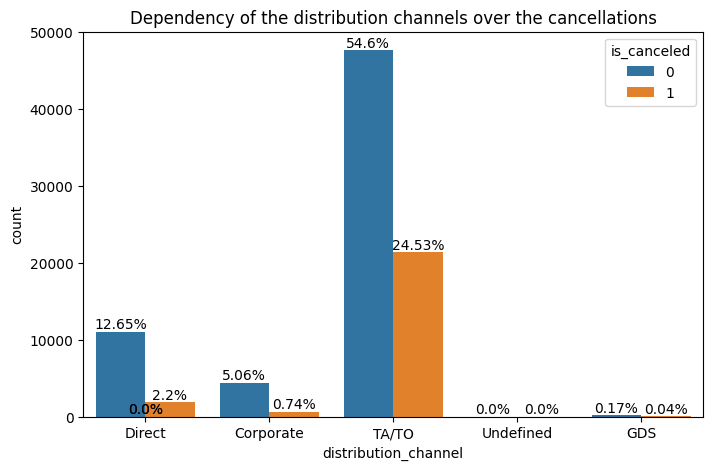

In [ ]:
# plotting countplot for the distribution channels affecting the cancellations of the bookings
plt.figure(figsize=(8,5))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['distribution_channel'],hue=hotel['is_canceled'])
plt.title('Dependency of the distribution channels over the cancellations')
annot(plot)
plt.show()

Conclusion : Most of the reservations as well as the cancellations were done in the TA/TO category.The undefined category of distribution channel has made no reservations.Bookings done through direct,Corporate,GDS distribution channels are less likely to get cancelled.



> **6) WHich market segment is used most for booking hotels and which market segment bookings are most canceled?**



In [ ]:
hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

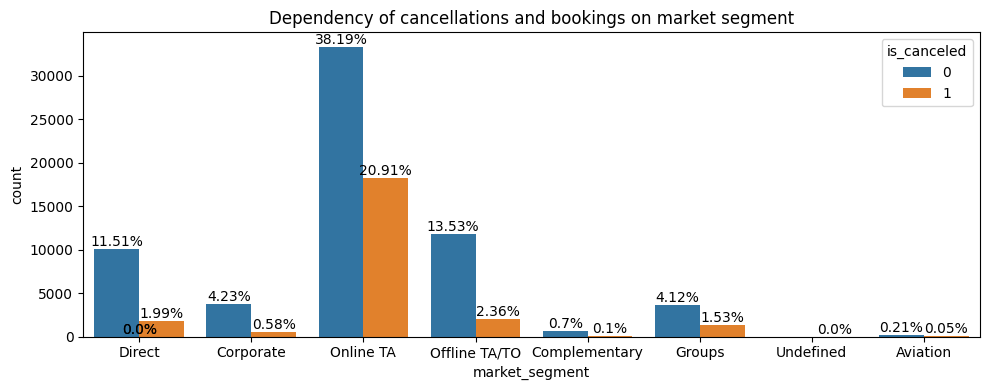

In [ ]:
# plotting the countplot for the market segment dependency on the booking and the cancellations
plt.figure(figsize=(10,4))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['market_segment'],hue=hotel['is_canceled'])
plt.title("Dependency of cancellations and bookings on market segment")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : Most of the bookings and cancellatons were done via 'Online TA'.Bookings made by Direct, Corporate, Offline TA/TO, Complementary, Groups, Aviation are less likey to get cancelled.



> **7) Which room generates a higher ADR ?**



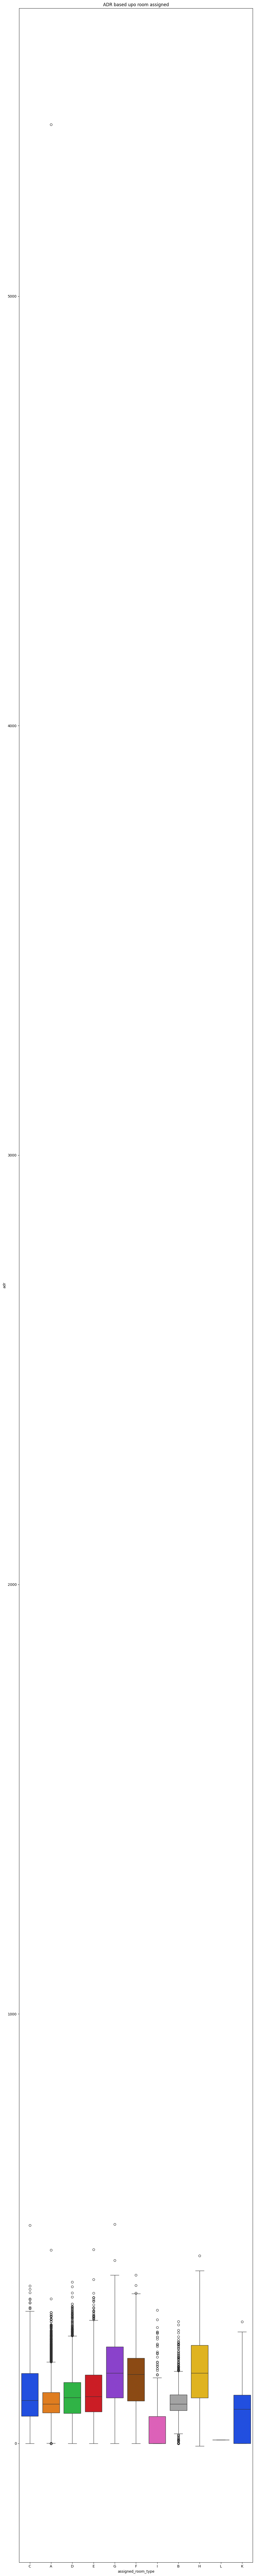

In [ ]:
# plotting the boxplot for the ADR on each assigned_room_type
plt.figure(figsize=(10,100))
ax=sns.boxplot(x=hotel['assigned_room_type'],y=hotel['adr'],palette="bright")
plt.title("ADR based upo room assigned")
plt.tight_layout()
plt.show()

Conclusion : Room types G, followed by H, generate high ADR. Room I has a very low ADR. The most popular room is A, but it has a lower ADR than other room types that are less popular with customers for bookings. To maximize revenue, the hotel should increase the number of rooms in A, G and H.



> **8) Which hotel type is the busiest ?**



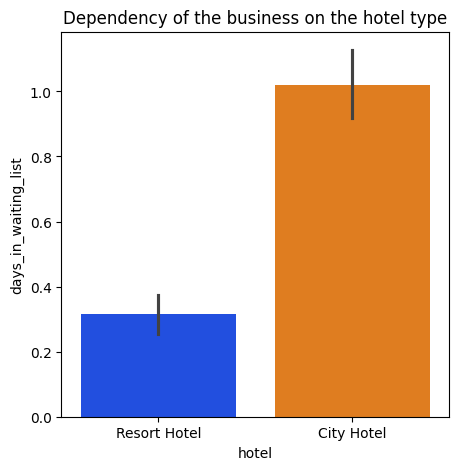

In [ ]:
# plotting the barplot for the dependency of the business on the hotel type
plt.figure(figsize=(5,5))
ax=sns.barplot(x=hotel['hotel'],y=hotel['days_in_waiting_list'],palette='bright')
plt.title("Dependency of the business on the hotel type")
plt.show()

Conclusion : A city hotel is busier than a resort hotel.



> **9) Which month is the busiest for hotels ?**



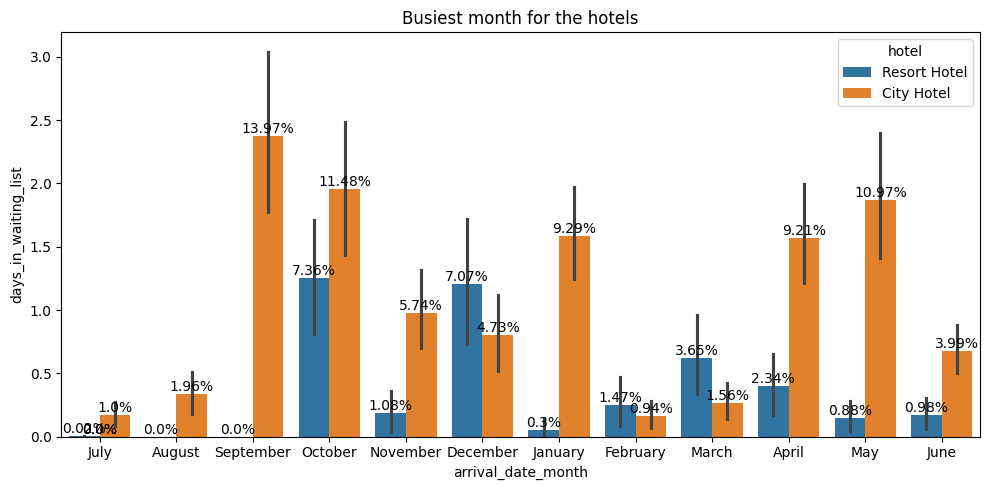

In [ ]:
# plotting barplot for seeing the busiest month for hotels
plt.figure(figsize=(10,5))
plot=plt.subplot(111)
ax=sns.barplot(x=hotel['arrival_date_month'],y=hotel['days_in_waiting_list'],hue=hotel['hotel'])
plt.title("Busiest month for the hotels")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : For City hotels Spetember seems to be the busiest month.Most people prefer city hotels for New Year and summer vacations.Resort hotels are preferred more during the Christmas eve and Chritsmas.July and August are less busiers than the rest months of the year.



> **10) Which customer type generates more revenue in terms of hotel types and customer types ?**



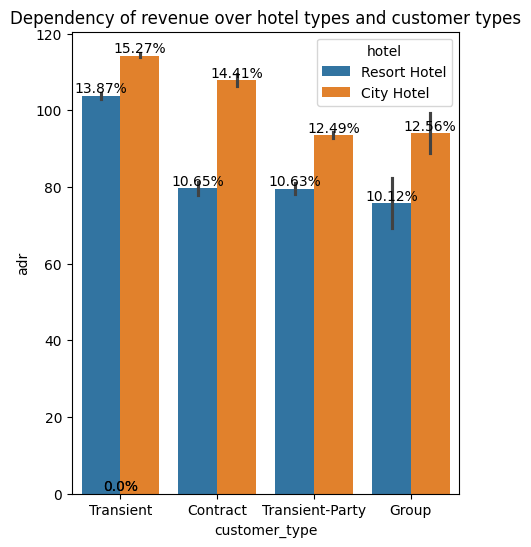

In [ ]:
# plotting the customer types and adr on a barplot with hue of hotel types
plt.figure(figsize=(5,6))
plot=plt.subplot(111)
ax=sns.barplot(x=hotel['customer_type'],y=hotel['adr'],hue=hotel['hotel'])
plt.title("Dependency of revenue over hotel types and customer types")
annot(plot)
plt.show()

Conclusion : City hotels generate more revenue(54.73%) than the resort hotel(45.47%)Transient type customers generates higher adr in the City hotels.Adr is generarated the least by the group type customers in the Resort hotels as well as the city hotels.



> **10) In terms of hotel types, how many parking spaces are most frequently requested by customers ?**



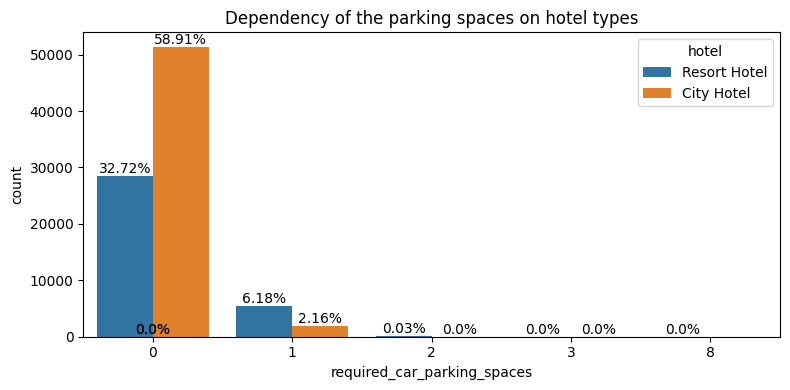

In [ ]:
# plotting the parking spaces are most frequently requested by customers
plt.figure(figsize=(8,4))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['required_car_parking_spaces'],hue=hotel['hotel'])
plt.title("Dependency of the parking spaces on hotel types")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : Most of thw customers(91.63%) donot want parking spaces.But 8.37% wants the parking space 1 and 2.Mostly the customers of the Resort hotels.Parking spaces 3 and 8 can be removed as no customer had requested for them.



> **11) What is the most common number of nights booked by customers ?**



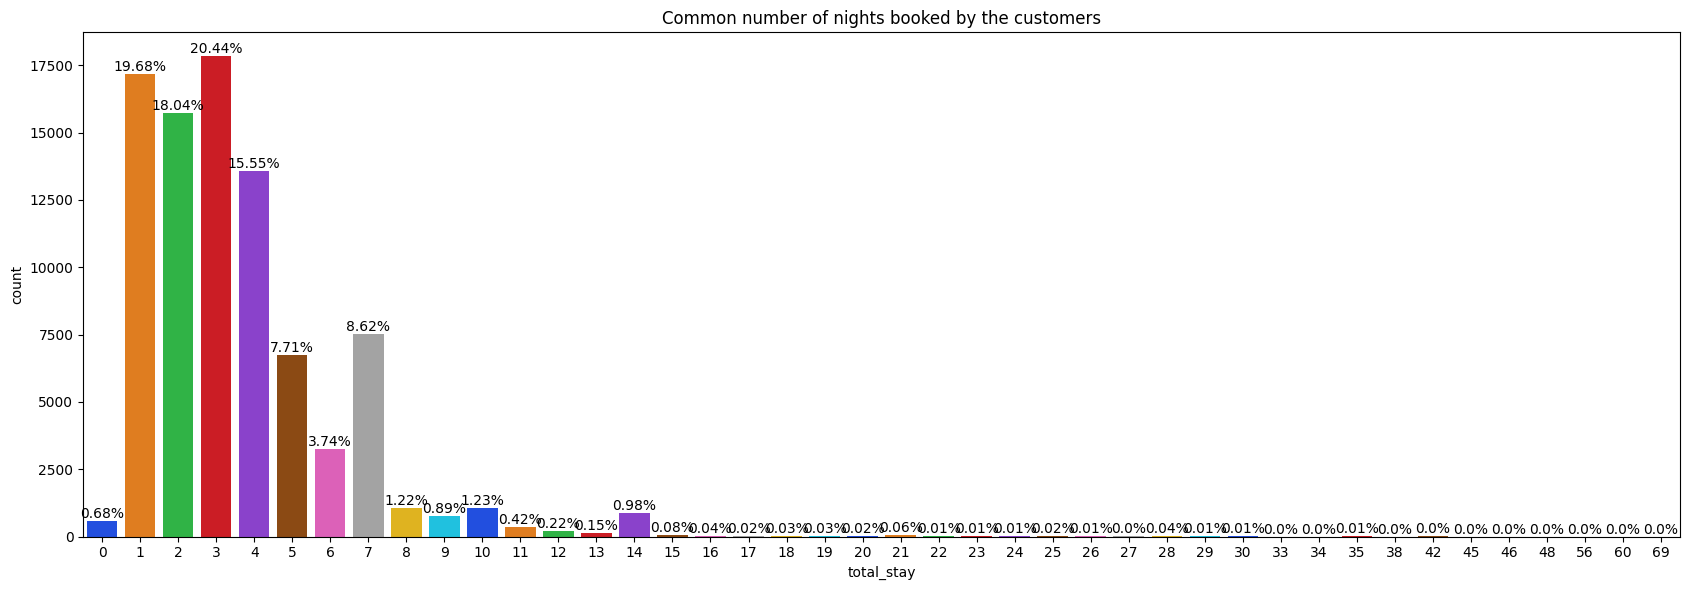

In [ ]:
# plotting the countplot for the total_stay of the customers
plt.figure(figsize=(17,6))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['total_stay'],palette='bright')
plt.title("Common number of nights booked by the customers")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : Mostly rooms for 3 nights were booked(20.44%).Very less customers make reservatuons for more than a week of stay.Customers prefer to book more of 7 night stay (8.62%) than 5 days(7.71%) or 6 days(3.74%) stay.More attention should be given to the bookings which are less than a week to increase the revenue.



> **13) What is the most common number of special requests made by customers and what kind of customers are they ?**



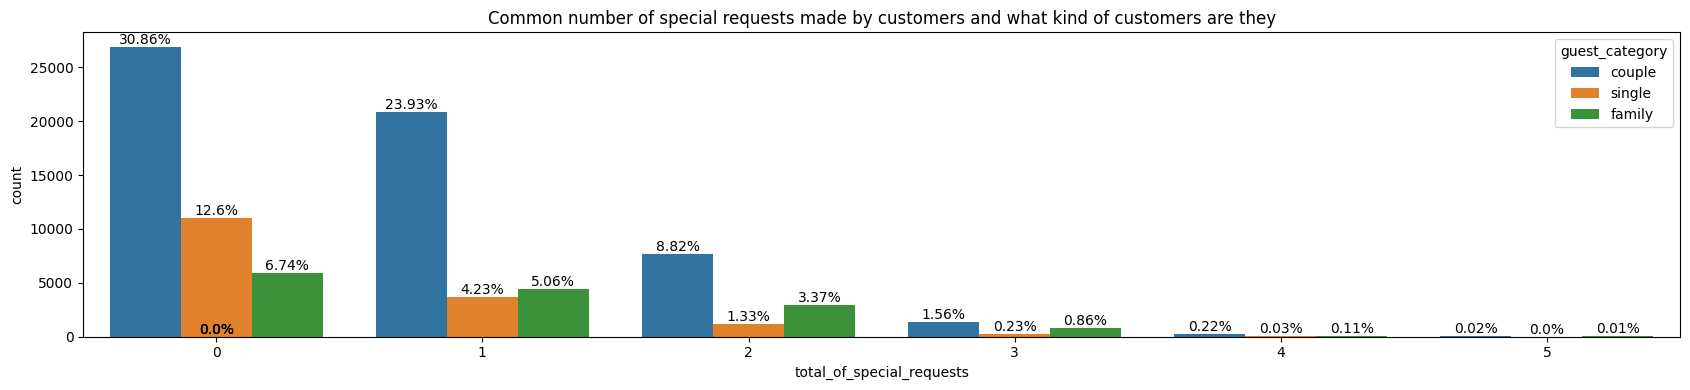

In [ ]:
# plotting the countplot for the special requests made by the customers and the type of cutomers
plt.figure(figsize=(17,4))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['total_of_special_requests'],hue=hotel['guest_category'])
plt.title("Common number of special requests made by customers and what kind of customers are they")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : Most customers donot make any special requests(50.2%).But out of the one who make special requests mostly one request is done(33.22%).For couple bookings the requests are frequent.Less frequently requests are made for single bookings.Very less cuatomers ask for five special requests.



> **14) Is the ADR affected by the hotel not giving a reserved room ?**



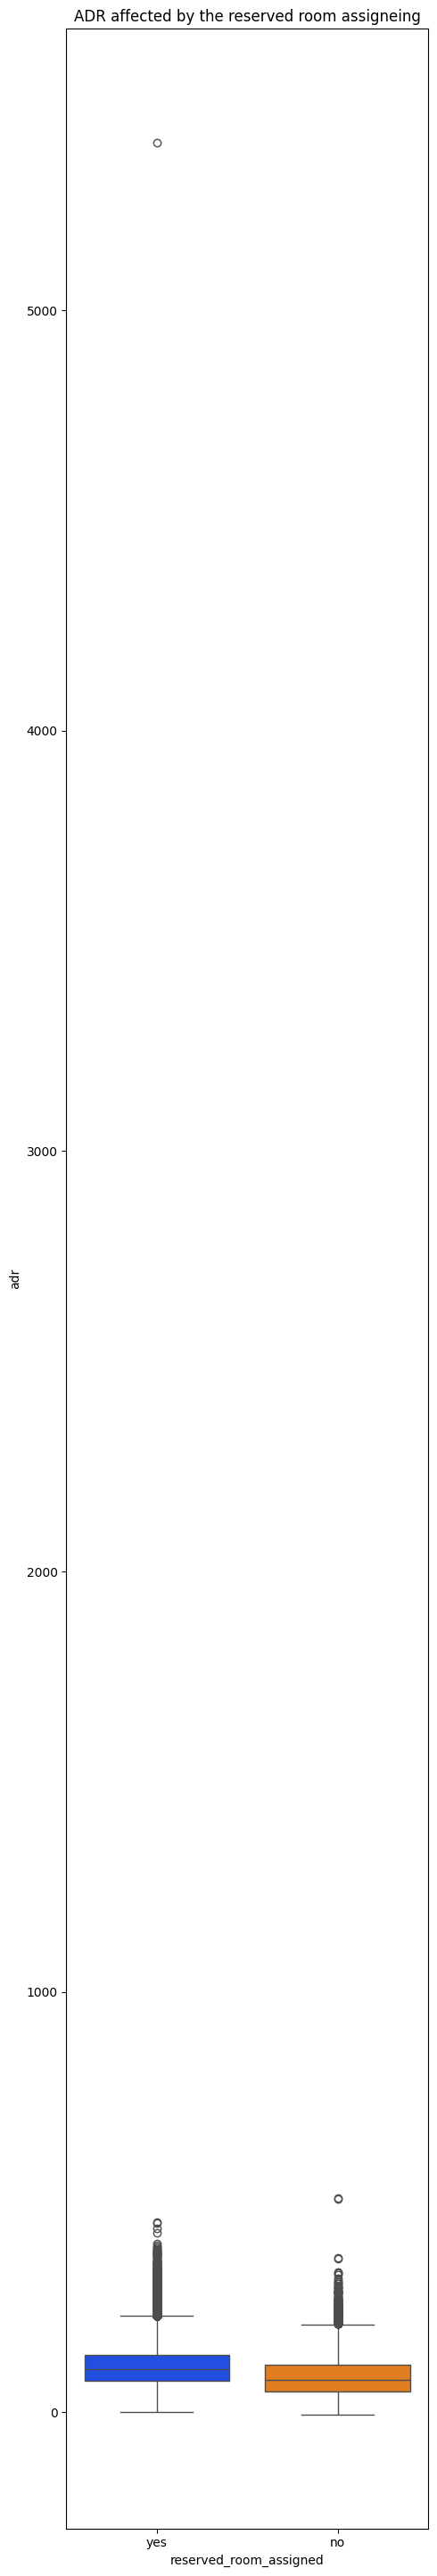

In [ ]:
# plotting the boxplot for not assigning the reserved room and adr dependent on each other
plt.figure(figsize=(5,29))
ax=sns.boxplot(x=hotel['reserved_room_assigned'],y=hotel['adr'],palette='bright')
plt.title("ADR affected by the reserved room assigneing")
plt.tight_layout()
plt.show()

Conclusion : Assigning or not assigning the reserved rooms to the customers doesnot have any effect with the ADR of the hotel.



> **15) The majority of the bookings were made for how many people and majority of cancellations of the bookings were made for how many people ?**


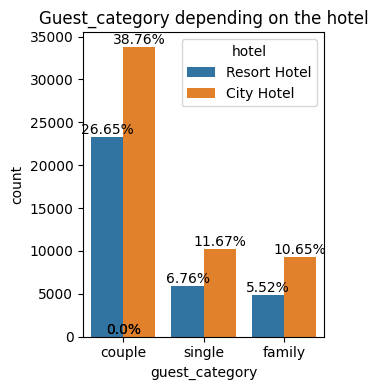

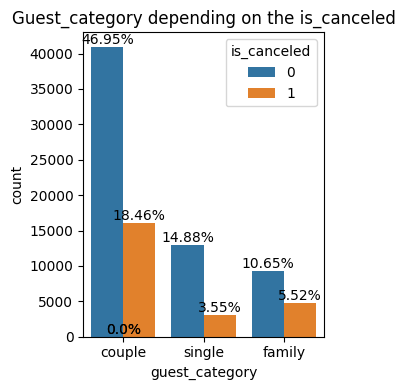

In [ ]:
# plotting the guest category of the bookings as well as the cancellations
var=['hotel','is_canceled']
for v in var:
  plt.figure(figsize=(6,4))
  plot=plt.subplot(1,2,1)
  ax=sns.countplot(x=hotel['guest_category'],hue=hotel[v])
  plt.title(f"Guest_category depending on the {v}")
  plt.tight_layout()
  annot(plot)
  plt.show()

Conclusion : Most of the bookings as well as cancellations were made by the couple category reservations.Bookings for the singles are less frequently cancelled.



> **16) Which country makes the most reservations and which agent makes the most bookings ?**



In [ ]:
# creating the dataframe for country
country_df = pd.DataFrame(hotel['country'].value_counts()).reset_index()
country_df.rename(columns={'count': 'num_of_bookings'},inplace=True)

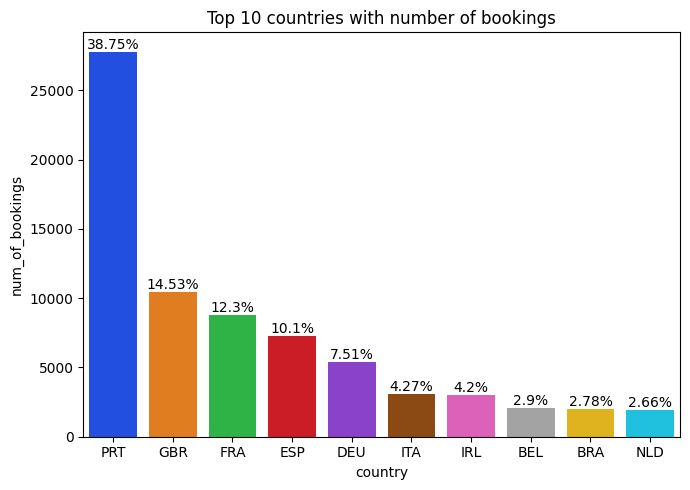

In [ ]:
# Plotting point plot for country with number of bookings
plt.figure(figsize=(7,5))
plot=plt.subplot(111)
ax=sns.barplot(x=country_df['country'].head(10), y=country_df['num_of_bookings'],palette='bright')
ax.set_title('Top 10 countries with number of bookings')
plt.tight_layout()
annot(plot)
plt.show()

In [ ]:
# creating the data frame for agents
agent_df=pd.DataFrame(hotel['agent'].value_counts()).reset_index()
agent_df.rename(columns={'count':'num_of_bookings'},inplace=True)

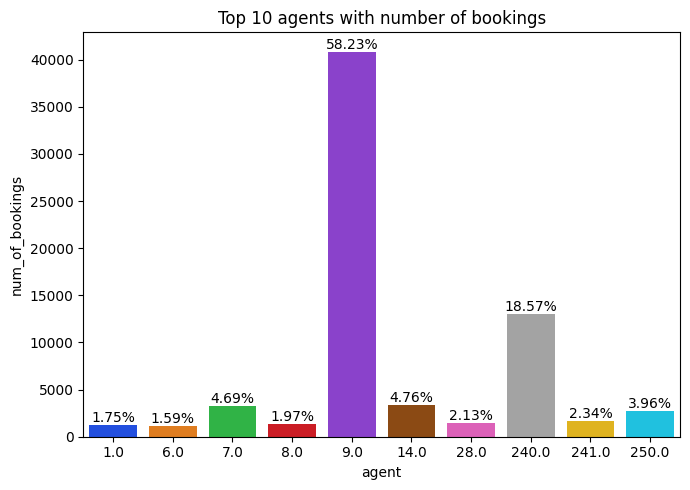

In [ ]:
# plotting the bar plot for the agent and the num of bookings doe
plt.figure(figsize=(7,5))
plot=plt.subplot(111)
ax=sns.barplot(x=agent_df['agent'].head(10),y=agent_df['num_of_bookings'],palette='bright')
plt.title("Top 10 agents with number of bookings")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : Majority of the reservations were done by the country PRT and the least by NLD.Majority of the bookings were made by agent 9 (58.23%) and least by 6 (1.59%).Top 5 countries to make the reservations are PRT, GBR, FRA, ESP, DEU.Agents 9 and 240 make the most bookings.



> **17) Does a longer waiting period cause to cancellations of bookings ?**



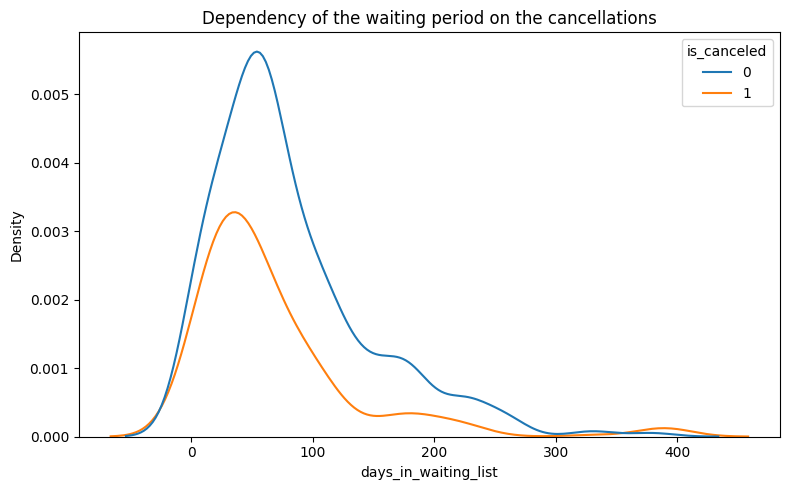

In [ ]:
# plotting kdeplot for the waiting period and the cancellations dependency
waiting_time=hotel[hotel['days_in_waiting_list']!=0]
plt.figure(figsize=(8,5))
plot=plt.subplot(111)
ax=sns.kdeplot(x=waiting_time['days_in_waiting_list'],hue=waiting_time['is_canceled'])
plt.title("Dependency of the waiting period on the cancellations")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : Waiting period doesnot seem to be a reason for the cancellations of the bookings.As most of the bookings which were cancelled were less than 150 days. But the density of the non-cancellations for the days lesser thean 150 days of waiting is more than the cancellations.



> **18) Which food is preferred the most ?**



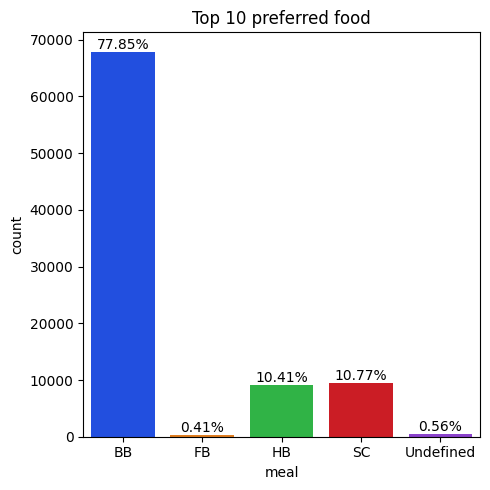

In [ ]:
# plotting barplot for the most preferred food
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=hotel['meal'],palette='bright')
plt.title("Top 10 preferred food")
plt.tight_layout()
annot(plot)
plt.show()

Conclusion : BB is the most preferred food.

### Multivariate Aanlysis



> **1) Correlation Heatmap**



In [ ]:
#making a copy of the actual dataset
hotel_df=hotel.copy()

In [ ]:
#extracting the attributes having object datatype
cat=[]
for v in hotel.columns:
  if hotel[v].dtype=='object':
    cat.append(v)

In [ ]:
# dropping the attributes from the copied dataset
hotel_df.drop(cat,axis=1,inplace=True)

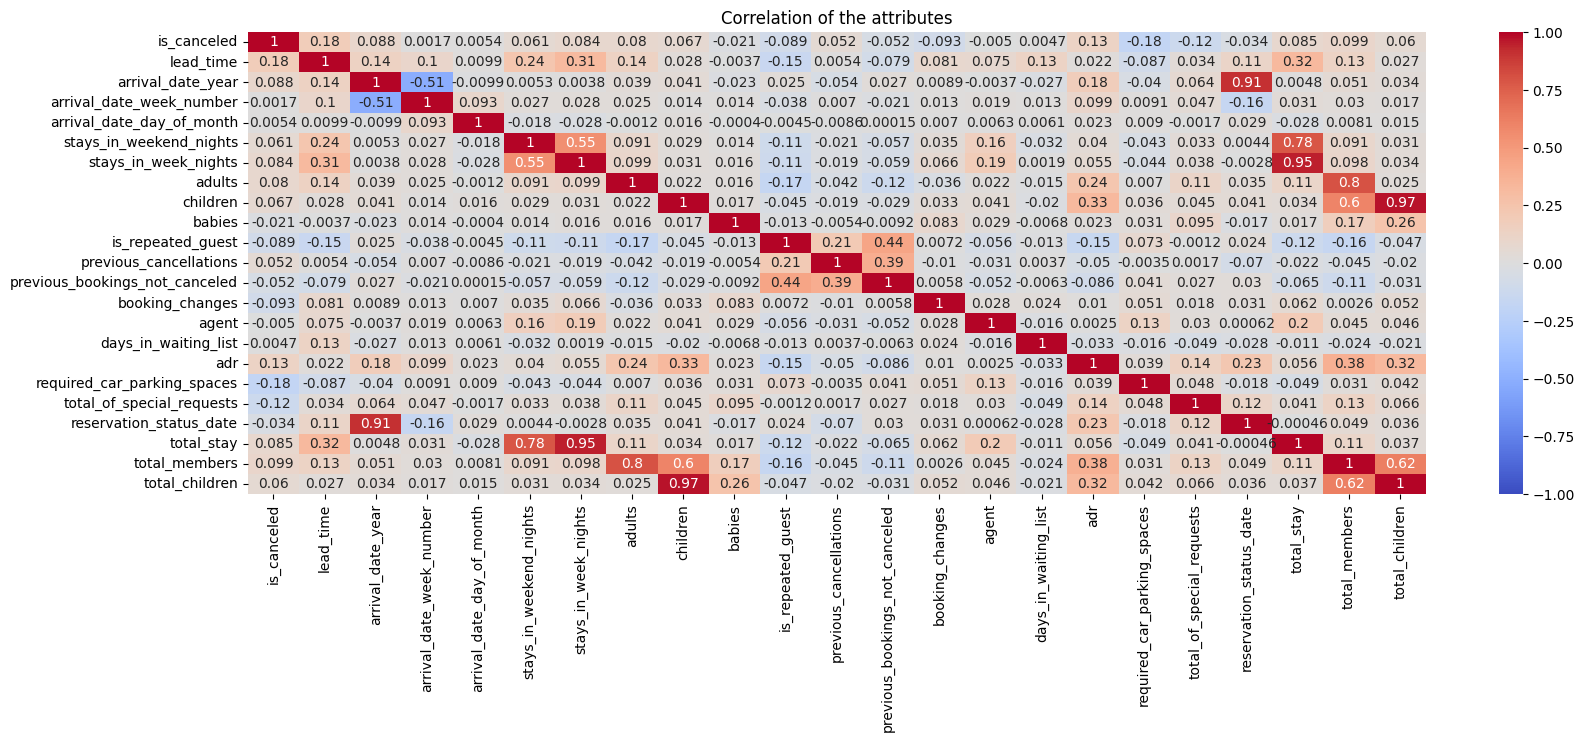

In [ ]:
# plotting heatmap for showing the relation among the different attributes
plt.figure(figsize=(19,6))
ax=sns.heatmap(data=hotel_df.corr(),vmin=-1,annot=True,cmap="coolwarm")
plt.title("Correlation of the attributes")
plt.show()

Conclusion :
*   Lead_time and cancellations of the bookings has a weak relation.So evidently it is not a factor for the cancellations.
*   Other than the diagonal in the heatmap there are other higher realations in the map which are very strong.This is because new variables were made from the pre-existing attributes and they will have some of the same values.









> **2) Pair Plot**



In [ ]:
# creating a new dataset for the pairplot
hotel_2=hotel[['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','meal','market_segment','distribution_channel',
               'reserved_room_type','assigned_room_type','deposit_type','days_in_waiting_list', 'customer_type', 'adr','total_stay',
               'total_members', 'total_children', 'reserved_room_assigned','guest_category', 'lead_time_category']]

<Figure size 900x900 with 0 Axes>

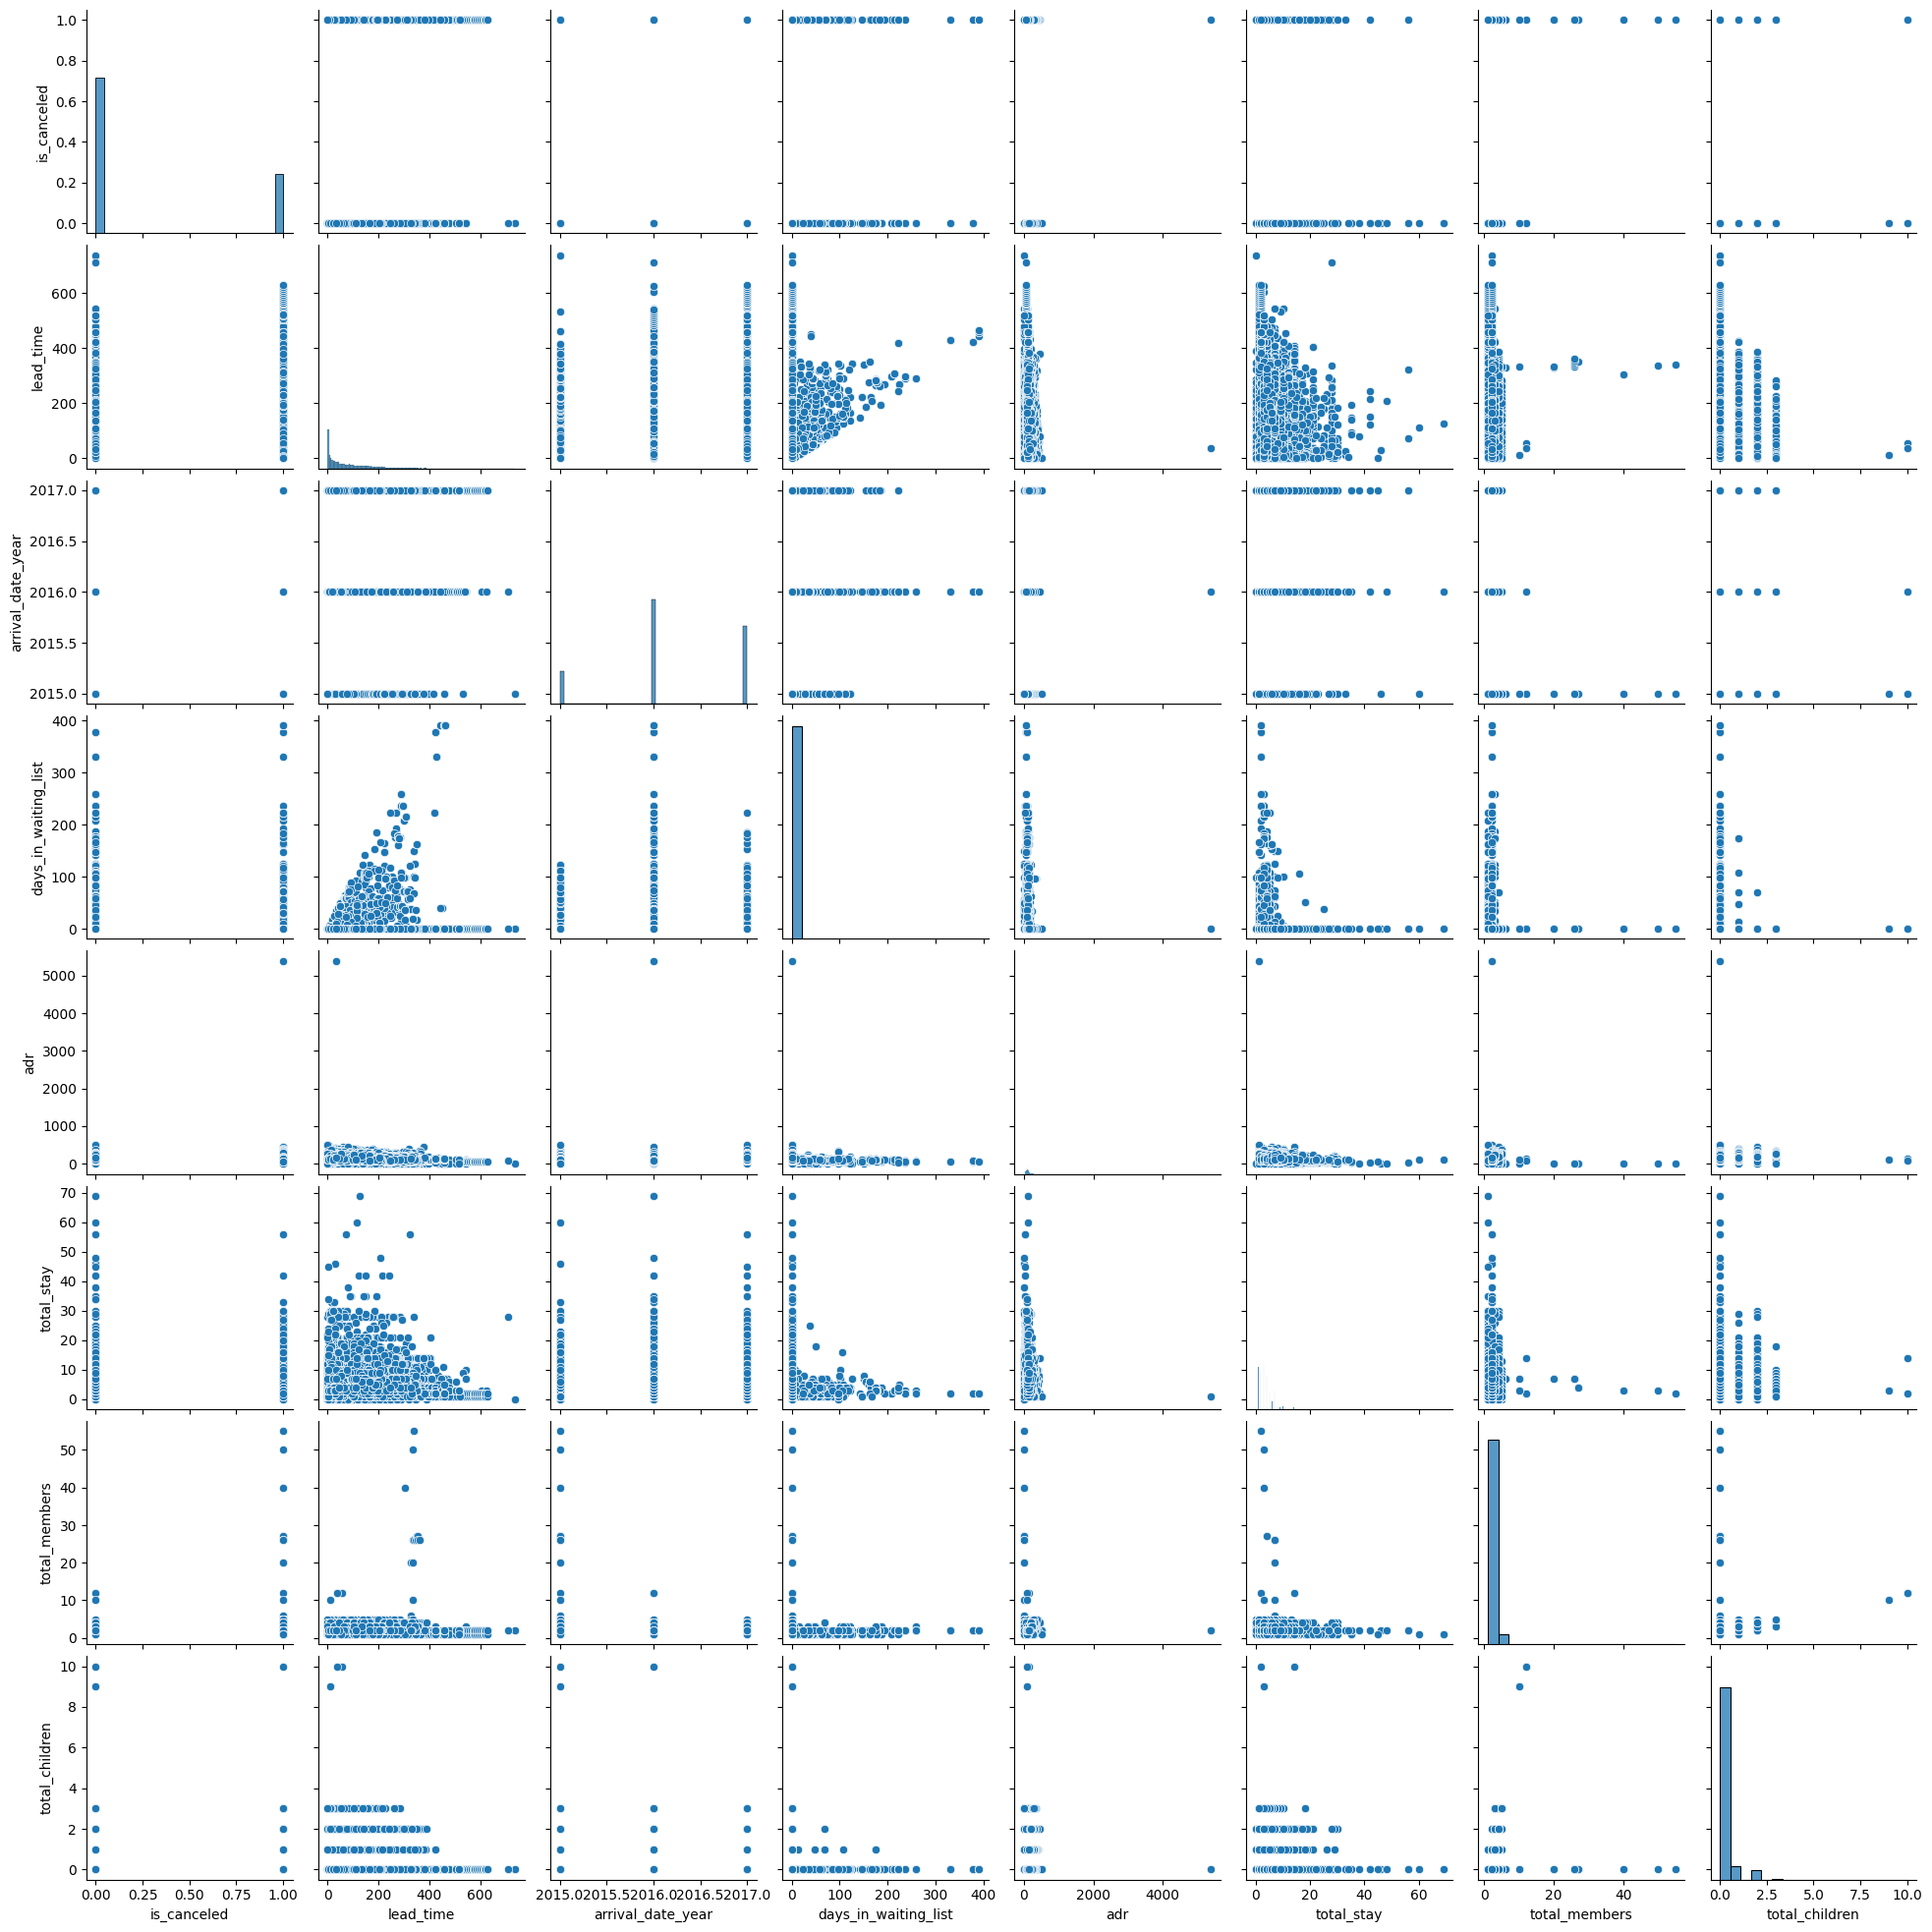

In [ ]:
# plotting the pair plot for the dataset
plt.figure(figsize=(6,6))
ax=sns.pairplot(hotel_2)
plt.tight_layout()
plt.show()

Conclusion :
* From the graph(lead_time vs is_canceled) we deduced that lead_time is not a reason for cancellations.
* From the graph(adr vs arrival_date_year) we deduced most of the bookings were done in 2015,2016,2017.
* The year 2016 was a bit busy as seen from graph(arrival_date_year vs days_in_waiting).
* Minimum waiting will lead to a higher adr(days_in_waiting_list vs adr).
* Customers who are single or couples prefer to stay more than the family ones or the ones with children(total_members vs total_stay) and (total_children vs total_stay)
* Days in waiting list is not a reason for the cancellations in the reservations.(days_in_waiting_list vs is_canceled)   





# **Changes to be made for progress in this business**



*   A city hotel has more bookings than a resort. Offer packages and promotions to promote bookings for the resort hotels.

*  BB is the most requested food. The hotel should maintain food quality while also offering discounts on other foods to promote other food types, reducing the burden on kitchen management and keeping a variety of food options available to customers.

* Most of the bookings are made through the online platform. Hotels can cut costs by eliminating market segments such as complementary and aviation because bookings through these segments are very low.

*  Because most bookings made through TA/TO distribution are followed by corporate distribution, hotels should invest in both TA/TO and corporate distribution channels. The GDS distribution channel can be eliminated by hoteliers because bookings made through it are extremely low.

*   Very few customers (3.86%) visited again. So hotels can increase repeat bookings by offering the right repeat booking incentives, understanding the motivations behind repeat bookings, marketing to your guests’ past interests, and assessing past bookings to identify priority guests.

*  Because rooms A and D are the most popular with customers, the hotel should maintain their quality. The hotel should promote rooms E, F, and G to increase demand by offering discounts. Because customers do not prefer to book room types B, C, H, and L, the hotel can eliminate them, lowering the cost of these rooms.

*   Customers do not want to pay a pre-deposit for a reservation. Hotels should promote advance deposits because not only does an advance deposit allow you to recognize revenue faster, it also greatly decreases the risk of cancellations.

*   Because 3 and 8 parking spaces were rarely requested by customers, hotels can only keep bookings for 1 and 2 parking spaces to save money.

*   15% of customers were not given reserved rooms. Make sure that guests get the rooms they have booked.

*  Almost 25% of customers cancelled their bookings. Hotel should implement a cancellation policy, discount on confirmed bookings, and send booking reminders to guests to reduce booking cancellations.

*   People typically book rooms for two people, so encourage family and group bookings. You can maximize revenue by promoting it with a discounted offer for group bookings.


# **Conclusions**


*   The top country with the most number of bookings is PRT, and the number one agent with the most number of bookings is 9.

*  Customers favored city hotels more than resort hotels by a margin of 61.07 percent.

* One of the four reservations is canceled.

* The most popular food is BB.

*  The Online (internet) platform is used to make the majority of bookings.

* The majority of the bookings are made using TA/TO, the leading distribution channel.

*   The vast majority of hotel bookings are made by new guests. Almost no consumers (3.86%) returned.

*  The customer wants Room A to be reserved the most.

*   Customers do not wish to make a bookings with a pre-deposit.

*   Customers (80%) favored making a hotel reservation for a short visit.

* Only 10% of people require space to park their cars.

* Most visitors are couples.

* The inability to assign a reserved room to a customer is not grounds for cancellation.

* Booking cancellations are not caused by a longer Lead time.

* A city hotel is busier than a resort.

* The busiest months for hotels are October and September. There isn't a lengthy wait for reservations in July.

* Not assigning a reserved room does not affect ADR.
